# Global Power Plant Database Assignment

In [1]:
from IPython.display import Image
Image(url= "https://www.greenpeace.org/usa/wp-content/uploads/2015/06/Southern-Company-Scherer-Georgia-Power-coal-plant.jpg")

## Introduction

### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### I have to 2 target variable in this project 
### 1) Primary Fuel   
### 2) capacity_mw 

## Libraries

In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (1.0)
Note: you may need to restart the kernel to use updated packages.


In [205]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [303]:
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
# From the dataset i can say that there are few columns in integer and few are in strings.
# Soon I will be droping few columns which are not important.

## EDA - Exploratory Data Analysis

In [304]:
df.shape

(908, 25)

In [4]:
# There are 908 rows and 25 columns in the dataset.

In [305]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
# It is a mixed dataset as 12 columns are object type and 13 columns are float type.
# There is missing values in few columns as count is not matching for every columns.

In [306]:
df.drop_duplicates(inplace = True)

In [307]:
df.shape

(908, 25)

In [6]:
# There are no duplicates in the dataset.

In [308]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [7]:
# There are few columns which are categorical in nature and few columns are continous in nature.

In [309]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,BEL Chikhalhol Wind Farm,IND0000437,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


In [8]:
# Total number of counts in each columns is not matching as there is missing values.
# The difference between the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

## Droping Columns

In [310]:
df.drop('country',inplace=True,axis=1)
df.drop('wepp_id',inplace=True,axis=1)
df.drop('other_fuel3',inplace=True,axis=1)
df.drop('estimated_generation_gwh',inplace=True,axis=1)
df.drop('other_fuel2',inplace=True,axis=1)
df.drop('gppd_idnr',inplace=True,axis=1)
df.drop('country_long',inplace=True,axis=1)
df.drop('url',inplace=True,axis=1)

In [311]:
df.shape

(908, 17)

In [9]:
# I have drop 8 columns from the dataset as it is of no use.
# Now i have 17 columns left for model building.

## Pair Plot

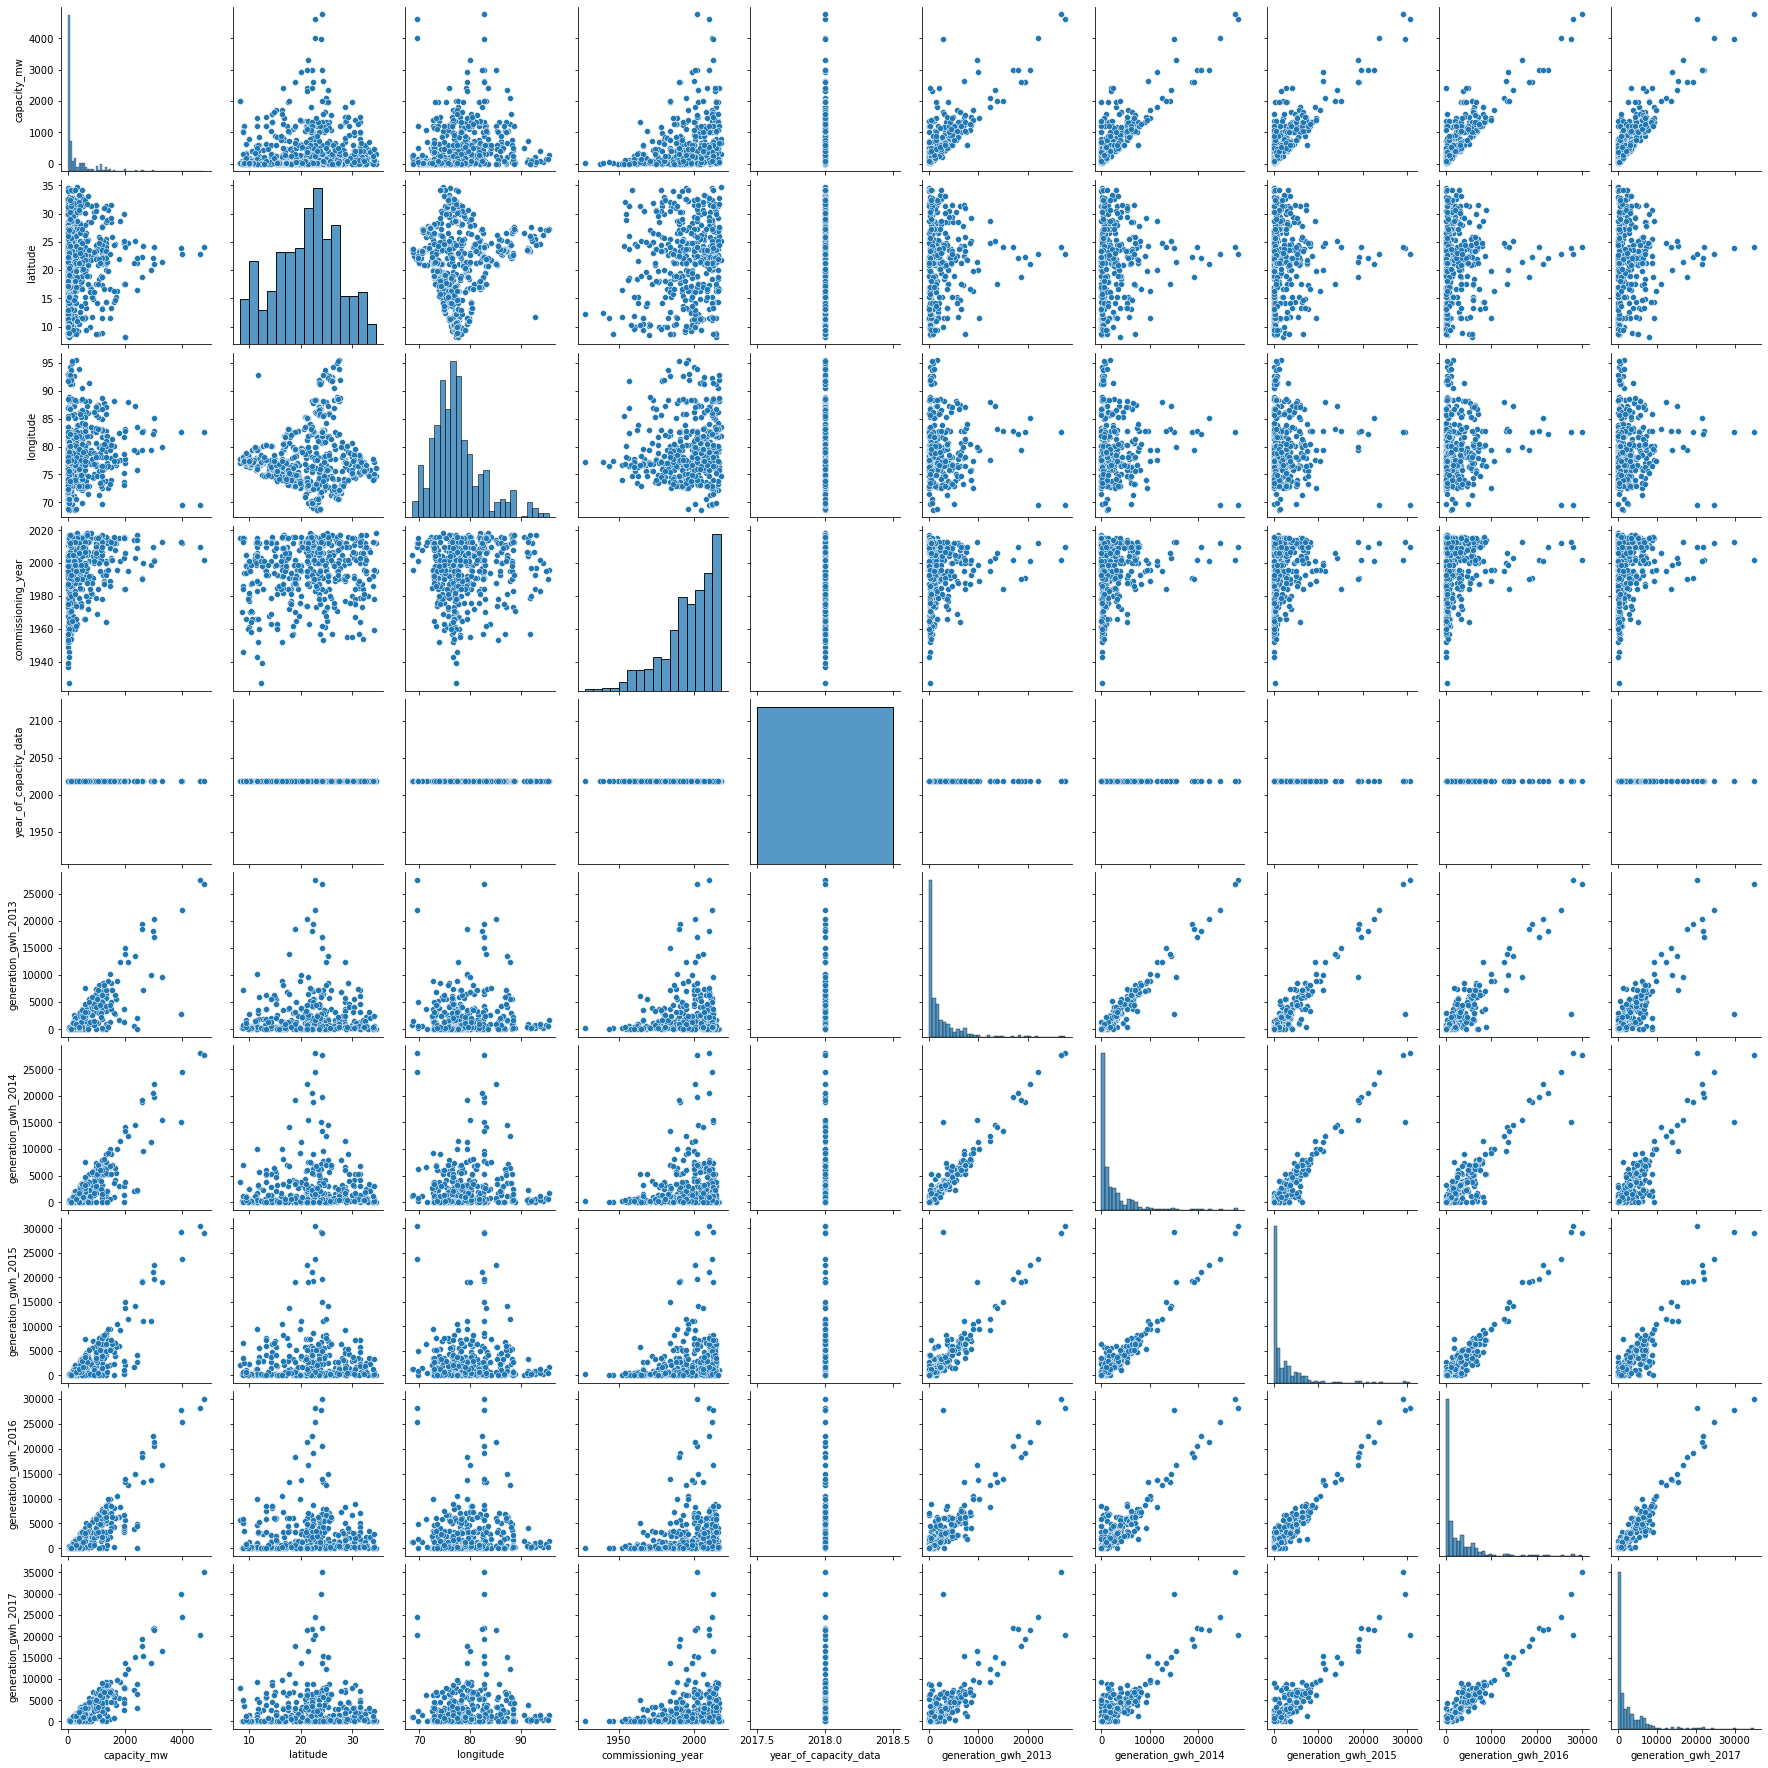

In [14]:
sns.pairplot(df)

In [10]:
# The above pair plot gives us the clear idea that target variable are positively corelated with few feature.
# Only few columns are not correlated.

## Count Plot

**primary_fuel**

In [39]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

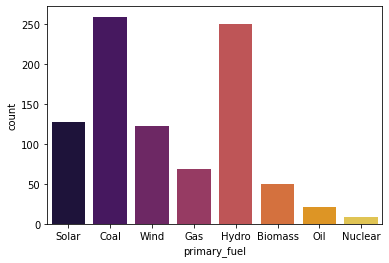

In [125]:
sns.countplot(df['primary_fuel'],palette = 'inferno',data=df);

In [11]:
# Coal is used higest as a primary fuel

**other_fuel1**

In [40]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

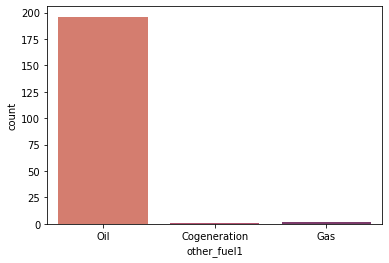

In [127]:
sns.countplot(df['other_fuel1'],palette = 'flare',data=df);

In [12]:
# Industries depends on oil when i comes to fuel.

## Box Plot

**geolocation_source**

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

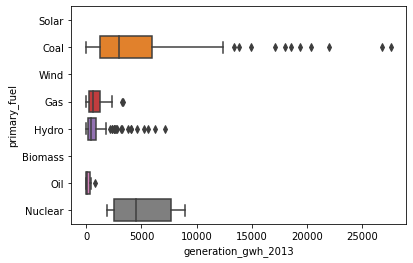

In [42]:
sns.boxplot(df['generation_gwh_2013'],df['primary_fuel'])

In [13]:
# for producing high energy the coal is used most.

### generation_gwh_2014

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

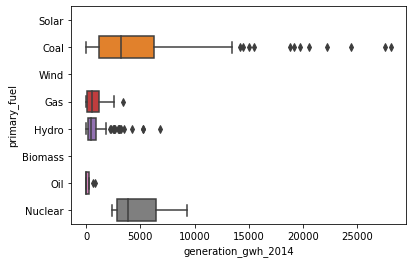

In [43]:
sns.boxplot(df['generation_gwh_2014'],df['primary_fuel'])

In [14]:
# for producing high energy the coal is used most.

### generation_gwh_2015

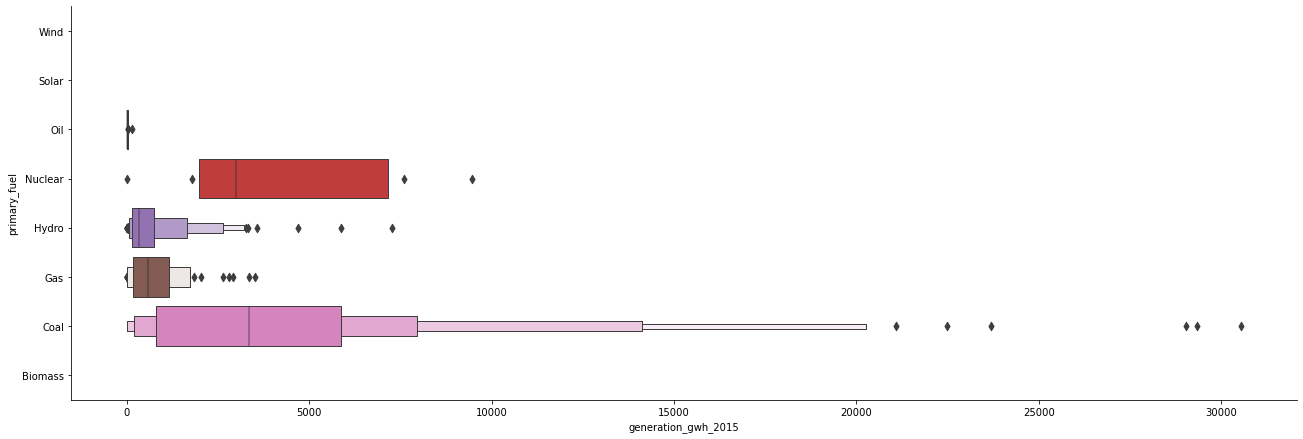

In [44]:
sns.catplot(y="primary_fuel",x="generation_gwh_2015",data=df.sort_values("primary_fuel",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [15]:
# for producing high energy the coal is used most.

### generation_gwh_2017

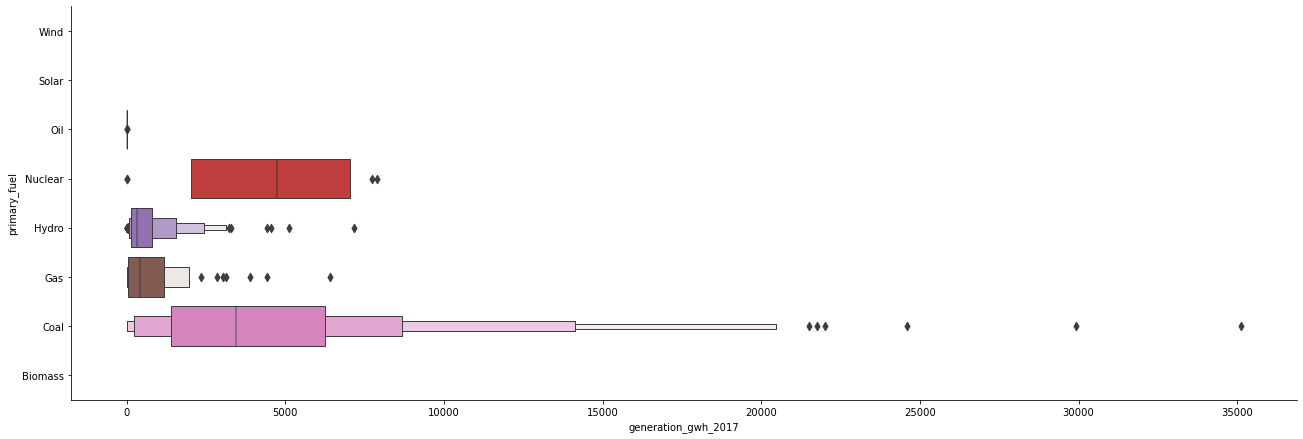

In [46]:
sns.catplot(y="primary_fuel",x="generation_gwh_2017",data=df.sort_values("primary_fuel",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [16]:
# for producing high energy the coal is used most.

**generation_data_source**

In [132]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

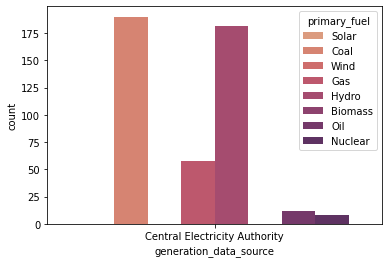

In [133]:
sns.countplot(df['generation_data_source'],palette = 'flare',hue='primary_fuel',data=df);

In [17]:
# Coal is used for producing mass energy.

## Filling the missing values

In [240]:
# filling the missing values of continious columns
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(),inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

# filling the missing values of categorical columns
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True)
df['owner'].fillna(df['owner'].mode()[0],inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [18]:
# There are few missing vales which i will fill it with help of mean and mode.

In [241]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [19]:
# Now i can say that there are no missing values in the dataset.

## Label Encoding

In [243]:
le = LabelEncoder()
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.other_fuel1 = le.fit_transform(df.other_fuel1)
df.geolocation_source = le.fit_transform(df.geolocation_source)
df.generation_data_source = le.fit_transform(df.generation_data_source)
df.name = le.fit_transform(df.name)
df.source = le.fit_transform(df.source)
df.owner = le.fit_transform(df.owner)

In [20]:
# I have used label encoder to convert the strings values into intergers.
# It will help me in model building.

In [245]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,2003.624449,56.113436,43.823789,1.733480,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
std,262.26132,580.221767,6.088110,4.781201,2.281339,0.081214,15.238021,82.501086,44.624092,0.676835,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.0
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.75000,16.837500,17.057825,74.390250,1.000000,2.000000,1997.000000,5.000000,22.000000,2.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.0
50%,453.50000,60.000000,21.278850,76.978950,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,2013.000000,95.250000,29.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


In [21]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference between the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

## Replacing all the zero values from different columns

In [246]:
# Replacing continous columns with mean
df['capacity_mw'] = df['capacity_mw'].replace(0,df['capacity_mw'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())
df['name'] = df['name'].replace(0,df['name'].mean())

In [247]:
# Replacing categorial columns with mode
df['owner']=df['owner'].replace(0,df['owner'].mode()[0])
df['source']=df['source'].replace(0,df['source'].mode()[0])
df['primary_fuel']=df['primary_fuel'].replace(0,df['primary_fuel'].mode()[0])
df['other_fuel1']=df['other_fuel1'].replace(0,df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].replace(0,df['geolocation_source'].mode()[0])
df['generation_data_source']=df['generation_data_source'].replace(0,df['generation_data_source'].mode()[0])

In [22]:
# There are few zero values that got replaced with the help of mean and mode.

## Histogram Plot

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>],
       [<AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_data_source'}>,
        <AxesSubplot:>, <

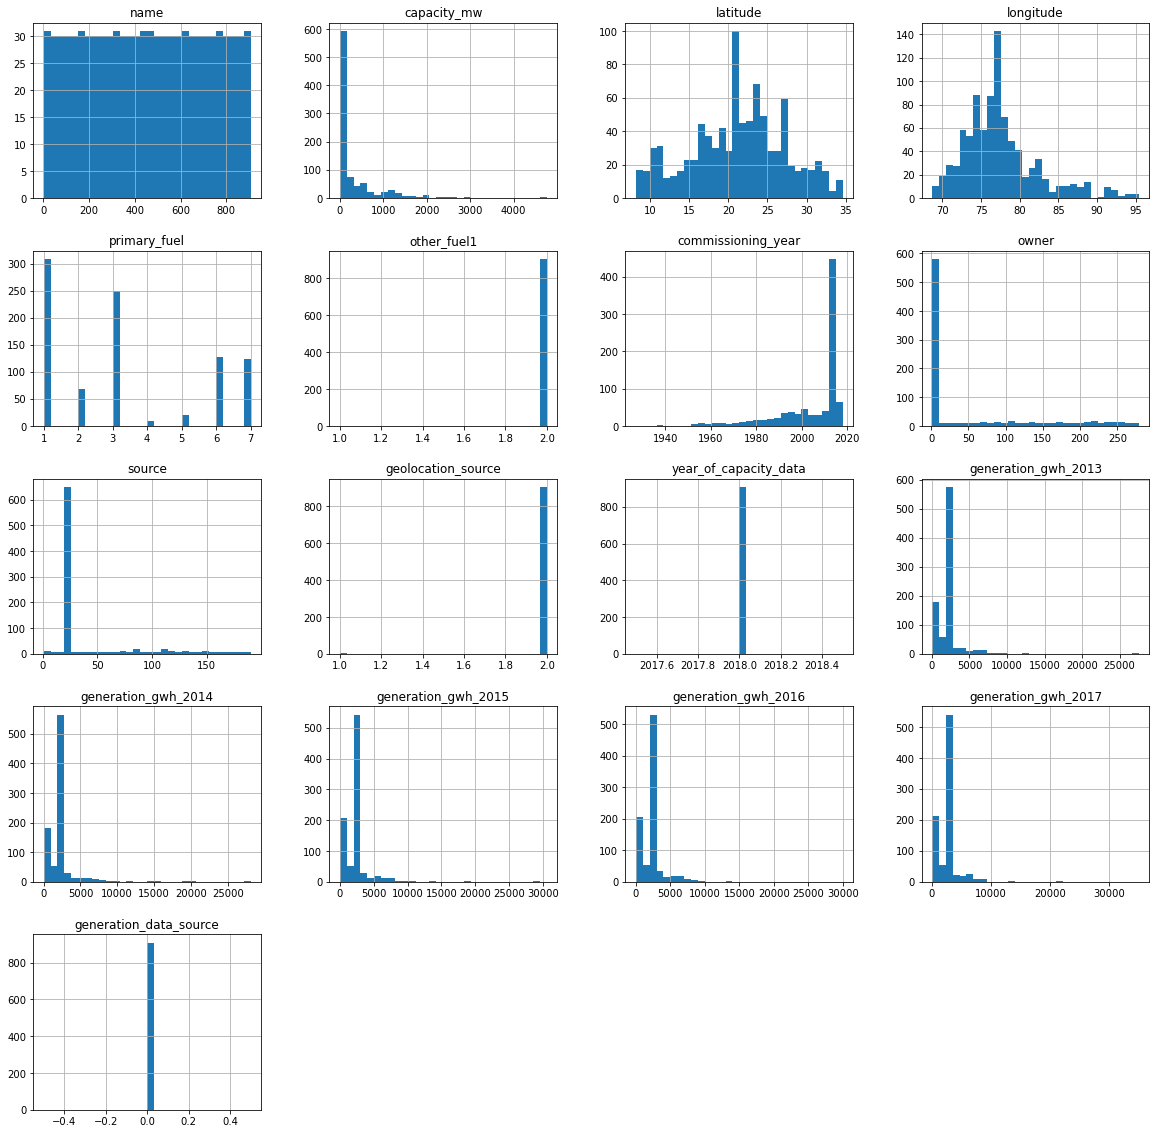

In [148]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

In [23]:
# There are skewness in the dataset which i will remove soon.

## Box Plot

name                         AxesSubplot(0.125,0.749828;0.168478x0.130172)
capacity_mw               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
latitude                  AxesSubplot(0.529348,0.749828;0.168478x0.130172)
longitude                 AxesSubplot(0.731522,0.749828;0.168478x0.130172)
primary_fuel                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
other_fuel1               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
commissioning_year        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
owner                     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
source                       AxesSubplot(0.125,0.437414;0.168478x0.130172)
geolocation_source        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
year_of_capacity_data     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
generation_gwh_2013       AxesSubplot(0.731522,0.437414;0.168478x0.130172)
generation_gwh_2014          AxesSubplot(0.125,0.281207;0.168478x0.130172)
generation_gwh_2015      

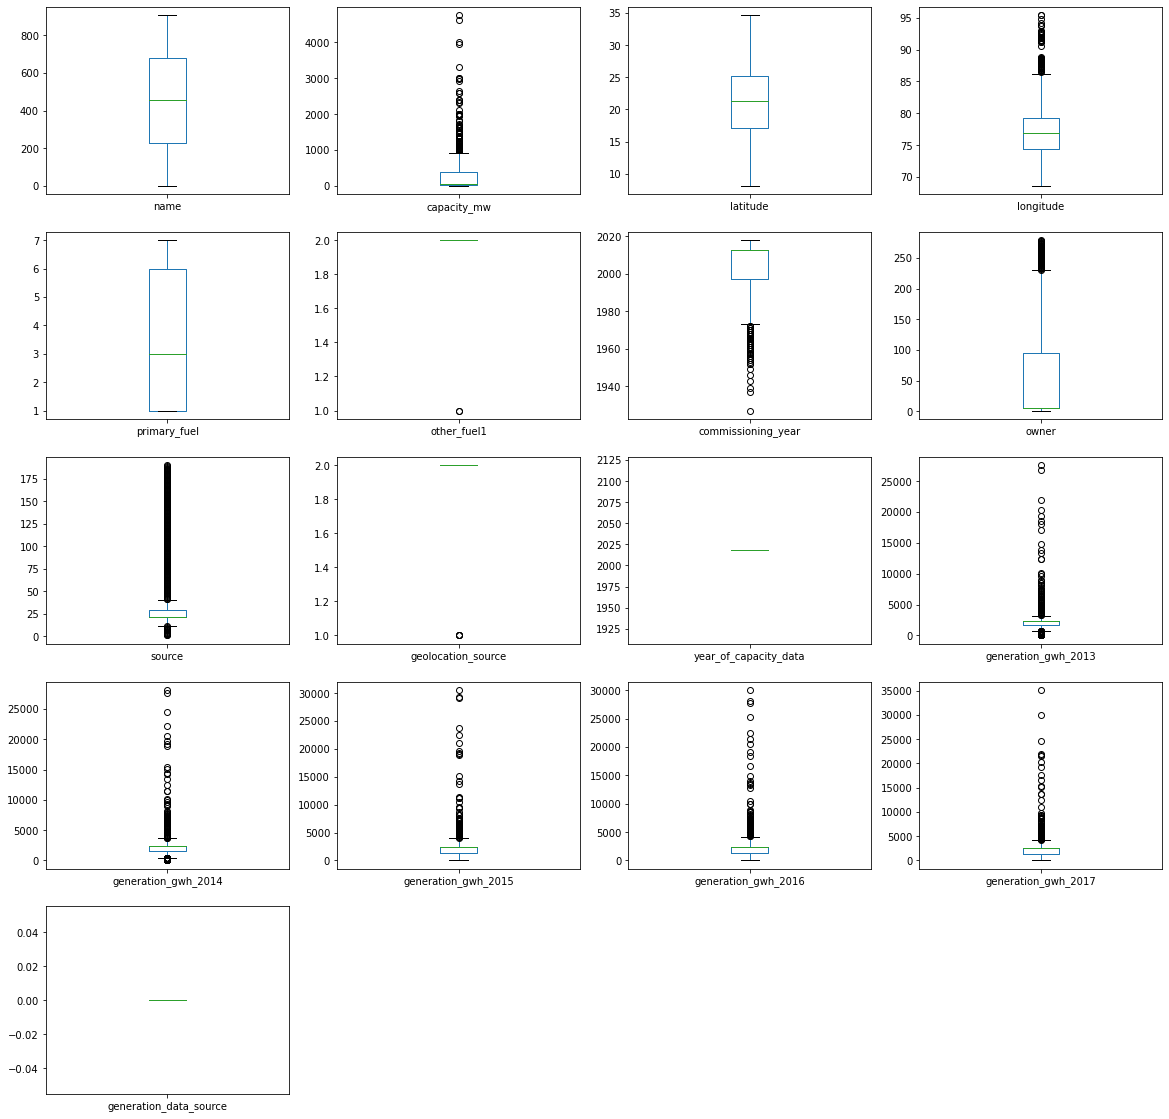

In [149]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

In [25]:
# There are outliers in the dataset which i will fix it with the help of Z Score.

## Z score

In [249]:
z_score = zscore(df[['commissioning_year','capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,850.000000,850.000000,850.000000,850.000000,850.000000,850.0
mean,450.502941,267.643479,21.099730,76.995817,3.331765,1.997647,2004.908235,59.427059,45.235294,1.995294,2018.0,2137.976785,2241.112887,2207.686606,2255.443374,2337.706028,0.0
std,264.713173,419.281783,6.122493,4.211341,2.254283,0.048479,13.338169,84.096136,45.678409,0.068478,0.0,1333.934499,1412.234581,1462.410039,1516.213664,1557.201817,0.0
min,1.000000,1.000000,8.168900,68.644700,1.000000,1.000000,1958.000000,1.000000,1.000000,1.000000,2018.0,0.019900,0.045355,0.118300,0.099500,0.425769,0.0
25%,219.250000,16.500000,16.924050,74.258975,1.000000,2.000000,1999.000000,5.000000,22.000000,2.000000,2018.0,1857.644000,1801.697075,1460.799644,1421.421125,1566.342750,0.0
50%,448.500000,51.000000,21.196189,76.729350,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,679.750000,330.000000,25.122225,78.909025,6.000000,2.000000,2013.000000,107.000000,42.750000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,907.000000,2000.000000,34.649000,91.565000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2018.0,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000,0.0


In [250]:
df.shape

(850, 17)

In [26]:
# After applying Z Score there are only 850 rows and 17 columns left in the dataset.

## Machine Learning

### Using Primary Fuel as a prediction

In [227]:
x = df.drop('primary_fuel',axis=1)
y = df.primary_fuel

In [27]:
# I have divided dataset into feature and label.

## StandardScaler

In [228]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.01132858, -0.6327477 ,  1.15775395, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.6990752 , -0.40484315,  0.59922135, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.69529531, -0.54516553,  0.1314078 , ...,  0.13099063,
         0.12468691,  0.        ],
       ...,
       [ 1.71795246, -0.57785969, -0.95179505, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72173236, -0.44779898,  0.53118614, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72551225, -0.59933761, -1.82473104, ...,  0.13099063,
         0.12468691,  0.        ]])

In [28]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [229]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.072073,name
1,2.073073,capacity_mw
2,1.065501,latitude
3,1.167514,longitude
4,1.028830,other_fuel1
5,1.319587,commissioning_year
6,3.117518,owner
7,2.532773,source
8,1.018644,geolocation_source
9,NaN,year_of_capacity_data


In [29]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Visualize the correlation

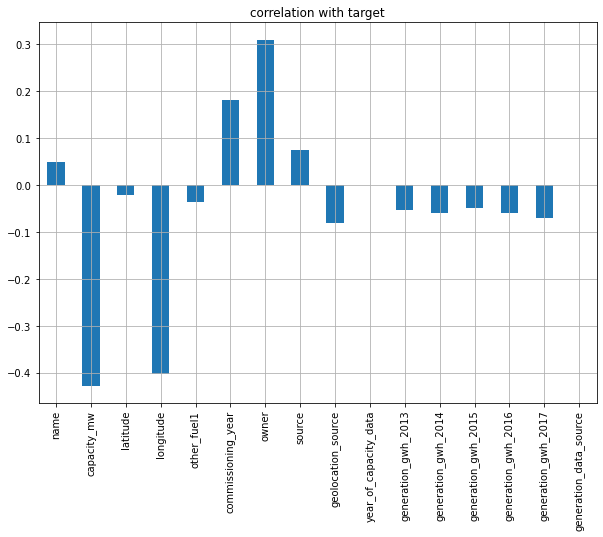

In [230]:
df.drop('primary_fuel',axis=1).corrwith(df.primary_fuel).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [30]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Model Building

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [31]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Logistic Regression

In [66]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred = log_reg.predict(x_test)

In [68]:
y_pred_proba = log_reg.predict_proba(x_test)

In [69]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[50,  1, 12,  0,  0,  7,  1],
       [ 4,  1,  8,  0,  1,  0,  0],
       [ 7,  0, 50,  0,  0,  0,  0],
       [ 2,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 4,  0,  0,  0,  0, 25,  6],
       [ 1,  0,  0,  0,  0,  1, 31]], dtype=int64)

In [70]:
log_reg.score(x_test,y_test)

0.728110599078341

In [71]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.74      0.70      0.72        71
           2       0.50      0.07      0.12        14
           3       0.68      0.88      0.77        57
           4       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       0.76      0.71      0.74        35
           7       0.79      0.94      0.86        33

    accuracy                           0.73       217
   macro avg       0.57      0.54      0.53       217
weighted avg       0.70      0.73      0.70       217



In [32]:
# Logistic Regression accuracy score 73%

## Auc Score

In [72]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.8950663245953075

## KNN

## Using SelectKBest Method for best features selection

In [73]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(12,'Score'))

          Features_Name       Score
5    commissioning_year  104.546213
7                source   76.625253
6                 owner   56.680864
14  generation_gwh_2017   51.234738
13  generation_gwh_2016   47.320573
1           capacity_mw   44.854156
11  generation_gwh_2014   41.515761
12  generation_gwh_2015   41.003124
10  generation_gwh_2013   35.478072
3             longitude   30.041199
4           other_fuel1   14.722273
2              latitude   13.193182


In [74]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred_proba = knn.predict_proba(x_test)

In [75]:
y_pred = knn.predict(x_test)

In [76]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[54,  1,  8,  0,  0,  7,  1],
       [ 4,  4,  5,  0,  0,  0,  1],
       [ 8,  0, 49,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 7,  0,  0,  0,  0, 23,  5],
       [10,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [77]:
knn.score(x_test,y_test)

0.7096774193548387

In [78]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        71
           2       0.80      0.29      0.42        14
           3       0.77      0.86      0.81        57
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.77      0.66      0.71        35
           7       0.74      0.70      0.72        33

    accuracy                           0.71       217
   macro avg       0.67      0.54      0.57       217
weighted avg       0.70      0.71      0.69       217



## Let use Grid search CV for the best parameter to improve the accuracy

In [79]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [80]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [81]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [82]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [83]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=5)

In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15)

In [85]:
y_pred_proba = knn.predict_proba(x_test)

In [86]:
y_pred = knn.predict(x_test)

In [87]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[54,  1,  8,  0,  0,  7,  1],
       [ 4,  4,  5,  0,  0,  0,  1],
       [ 8,  0, 49,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1],
       [ 7,  0,  0,  0,  0, 23,  5],
       [10,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [88]:
knn.score(x_test,y_test)

0.7096774193548387

In [89]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.63      0.76      0.69        71
           2       0.80      0.29      0.42        14
           3       0.77      0.86      0.81        57
           4       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.77      0.66      0.71        35
           7       0.74      0.70      0.72        33

    accuracy                           0.71       217
   macro avg       0.67      0.54      0.57       217
weighted avg       0.70      0.71      0.69       217



In [33]:
# In KNN algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is neither improving nor reducing the accuracy score.
# KNN Accuracy Score 71%.

## Auc Score

In [90]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.8081401636128959

## RandomForestClassifier

In [91]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred_proba = rfc.predict_proba(x_test)

In [92]:
y_pred = rfc.predict(x_test)

In [93]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[60,  1,  7,  0,  0,  3,  0],
       [ 3,  6,  2,  0,  3,  0,  0],
       [ 4,  0, 53,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [94]:
rfc.score(x_test,y_test)

0.847926267281106

In [95]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.81      0.85      0.83        71
           2       0.67      0.43      0.52        14
           3       0.85      0.93      0.89        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.91      0.91      0.91        35
           7       0.97      1.00      0.99        33

    accuracy                           0.85       217
   macro avg       0.60      0.59      0.59       217
weighted avg       0.83      0.85      0.84       217



## Let use Grid search CV for the best parameter to improve the accuracy

In [96]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [97]:
rfc = grd.best_estimator_

In [98]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [99]:
y_pred_proba = rfc.predict_proba(x_test)

In [100]:
y_pred = rfc.predict(x_test)

In [101]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[61,  0,  7,  0,  0,  2,  1],
       [ 4,  1,  8,  0,  1,  0,  0],
       [ 5,  0, 52,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [102]:
rfc.score(x_test,y_test)

0.8202764976958525

In [103]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82        71
           2       0.50      0.07      0.12        14
           3       0.78      0.91      0.84        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.94      0.89      0.91        35
           7       0.92      1.00      0.96        33

    accuracy                           0.82       217
   macro avg       0.56      0.53      0.52       217
weighted avg       0.78      0.82      0.79       217



In [34]:
# In Random forest algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is reducing accuracy score by 3%.
# Random forest Accuracy Score 85%.

## Auc Score

In [104]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.9419790854251552

## Decision Tree Classifier

In [105]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_proba = dtc.predict_proba(x_test)

In [106]:
y_pred = dtc.predict(x_test)

In [107]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[55,  5,  7,  0,  1,  3,  0],
       [ 2,  7,  4,  0,  0,  1,  0],
       [ 4,  3, 50,  0,  0,  0,  0],
       [ 2,  2,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [108]:
dtc.score(x_test,y_test)

0.815668202764977

In [109]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.85      0.77      0.81        71
           2       0.35      0.50      0.41        14
           3       0.82      0.88      0.85        57
           4       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         2
           6       0.89      0.89      0.89        35
           7       0.97      1.00      0.99        33

    accuracy                           0.82       217
   macro avg       0.70      0.61      0.61       217
weighted avg       0.83      0.82      0.81       217



## Let use Grid search CV for the best parameter to improve the accuracy

In [110]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [111]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [112]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [113]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 6}


In [114]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

In [115]:
y_pred_proba = dtc.predict_proba(x_test)

In [116]:
y_pred = dtc.predict(x_test)

In [117]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[55,  4, 10,  0,  0,  2,  0],
       [ 2,  5,  6,  0,  1,  0,  0],
       [ 2,  0, 53,  0,  2,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [118]:
dtc.score(x_test,y_test)

0.8110599078341014

In [119]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8110599078341014

In [120]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.82      0.77      0.80        71
           2       0.42      0.36      0.38        14
           3       0.77      0.93      0.84        57
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.94      0.86      0.90        35
           7       0.97      1.00      0.99        33

    accuracy                           0.81       217
   macro avg       0.56      0.56      0.56       217
weighted avg       0.80      0.81      0.80       217



In [35]:
# In Decision Tree algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is reducing accuracy score by 1%.
# Random forest Accuracy Score 82%.

## Auc Score

In [121]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.7876514781806456

## Saving the Best Model

In [123]:
import pickle

In [124]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [36]:
from IPython.display import Image
Image(url= "https://dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg")

In [37]:
# The best model is Random Forest classifier whose accuracy score is 85%.

# Regression Model

In [251]:
df.drop('generation_gwh_2014',inplace=True,axis=1)

In [38]:
# Droping generation_gwh_2014 column as it is of no use.

### Using capacity_mw for prediction

In [252]:
x = df.drop('capacity_mw',axis=1)
y = df.capacity_mw

In [39]:
# I have divided dataset into feature and label.

## StandardScaler

In [253]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.01132858,  1.15775395, -0.89219288, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.6990752 ,  0.59922135, -0.56709319, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.69529531,  0.1314078 , -1.81108718, ...,  0.13099063,
         0.12468691,  0.        ],
       ...,
       [ 1.71795246, -0.95179505, -0.33612819, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72173236,  0.53118614, -0.77173279, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72551225, -1.82473104,  0.11427851, ...,  0.13099063,
         0.12468691,  0.        ]])

In [40]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [254]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.068052,name
1,1.064025,latitude
2,1.279360,longitude
3,1.410384,primary_fuel
4,1.029593,other_fuel1
5,1.324882,commissioning_year
6,3.199437,owner
7,2.770688,source
8,1.022408,geolocation_source
9,NaN,year_of_capacity_data


In [41]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Visualize the correlation

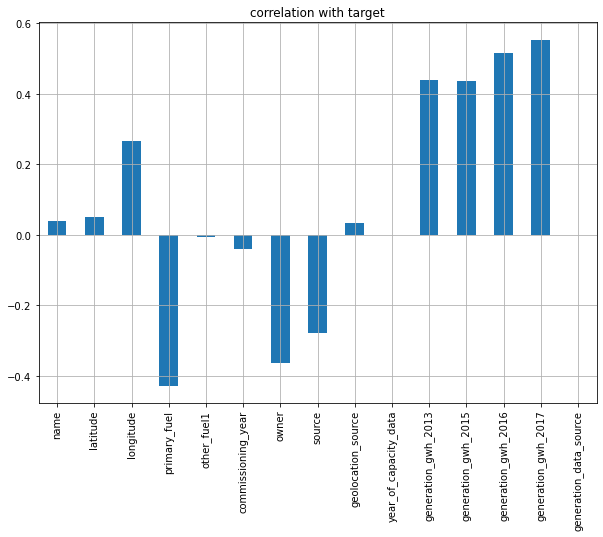

In [255]:
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [42]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Model Building

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [43]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Linear Regression model

In [257]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [258]:
# adjusted r2 score
rg.score(x_train,y_train)

0.5845330885904264

In [259]:
rg.score(x_test,y_test)

0.5253369146790394

In [260]:
y_pred = rg.predict(x_test)
y_pred

array([ 434.76226065,  375.29342301,  379.68646155,  -44.02932115,
        -69.72340273,  128.6919296 , -197.78431447,  363.55396157,
        -10.58977443,  -43.48051365,  110.27405678,  558.10395559,
        136.14034171,  363.23289533, 1015.09920227,  112.8819729 ,
       -157.75000376,   17.11235035,  225.88507901,  -75.51628898,
         60.44095038,  588.2192886 ,  305.11674207,   66.10244722,
       1255.42696698,  402.38612512,  987.44361276,  147.3747841 ,
        297.09688473,  357.44496709,  263.26247093,  -77.96194114,
        320.35848883,  135.93635673,  406.22068295, 1483.36358761,
        608.4135937 ,  459.05932696,  446.58044359,  119.64227144,
        413.1306891 ,  164.86011123,  -23.49871351,   -7.03405788,
         92.4807974 ,  291.10866809,  113.11648382,  668.05368762,
        148.65544625,  229.65796557,  104.70862021, 1070.17920047,
        118.56711428,   75.77546584,    2.25960099,   19.49273589,
        414.46922281,  215.02199646, 1246.97799367,  -36.50229

### MSE

In [261]:
mean_squared_error(y_test,y_pred)

69987.37951812055

### RMSE

In [262]:
np.sqrt(mean_squared_error(y_test,y_pred))

264.55127956243297

### R2 Score

In [263]:
r2_score(y_test,y_pred)

0.5253369146790394

In [ ]:
# Linear Regression accuracy score 52%

## Random Forest Regressor Model

In [264]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [265]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9675066667086625

In [266]:
rf.score(x_test,y_test)

0.7887332529993112

In [267]:
y_pred = rf.predict(x_test)
y_pred

array([   7.732     ,   22.2385    ,   18.6855    ,   16.2325    ,
         14.617     ,   28.8095    ,    5.79      ,  567.9582    ,
         98.06      ,   13.568     ,   20.233     ,  732.898     ,
         52.671     ,  452.4023    , 1242.0708    ,  246.1535    ,
          7.5925    ,   37.202     ,   20.2815    ,   77.09931889,
        105.82513   ,  645.844     ,  421.423     ,   26.8422    ,
       1302.655     ,  127.3003    , 1244.6008    ,  295.107     ,
         30.91      ,  140.122     ,   27.904     ,   41.109     ,
         30.835     ,  238.2222    ,   14.3565    , 1275.75      ,
        659.636     ,  565.976     ,   33.971     ,  162.696     ,
         11.5235    ,  102.345     ,  139.66592   ,   24.5456    ,
         25.7455    ,  725.571     ,   27.748     ,  457.1364    ,
         28.161     ,  409.3973    ,   75.37778267, 1260.6       ,
        364.92      ,  138.1925    ,   29.99      ,   32.292     ,
        145.389     ,  379.57252   , 1188.08      ,   43.7605 

### RMSE

In [269]:
np.sqrt(mean_squared_error(y_test,y_pred))

176.4951233692313

### R2 Score

In [270]:
r2_score(y_test,y_pred)

0.7887332529993112

In [44]:
# Random Forest Regressor accuracy score 78%

## Decision Tree Regressor Model

In [271]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [272]:
dt.score(x_train,y_train)

1.0

In [273]:
dt.score(x_test,y_test)

0.6056109537789869

In [274]:
y_pred = dt.predict(x_test)
y_pred

array([9.00000e+00, 2.52000e+01, 6.00000e+00, 1.02500e+01, 1.00000e+00,
       8.40000e+00, 5.00000e+00, 3.00000e+02, 1.50000e+02, 6.30000e+00,
       7.50000e+00, 6.00000e+02, 9.18000e+01, 6.60000e+02, 1.08000e+03,
       1.92000e+02, 1.90000e+01, 8.00000e+01, 2.00000e+00, 1.00000e+02,
       1.30000e+02, 6.30000e+02, 5.55000e+02, 2.28000e+01, 1.32500e+03,
       3.50000e+01, 1.65000e+03, 9.60000e+01, 2.40000e+01, 1.55000e+02,
       2.60000e+01, 2.00000e+00, 1.60000e+01, 2.40000e+02, 4.00000e+00,
       1.20000e+03, 4.20000e+02, 6.00000e+02, 3.85000e+01, 1.05000e+02,
       1.60000e+01, 9.00000e+01, 3.74571e+02, 1.80000e+01, 5.00000e+00,
       1.20000e+03, 5.50000e+01, 3.30500e+02, 7.50000e+00, 3.00000e+02,
       1.00000e+02, 1.20000e+03, 7.02860e+02, 6.40000e+01, 1.50000e+01,
       1.50000e+01, 8.00000e+01, 3.00000e+02, 1.34000e+03, 1.05000e+01,
       3.00000e+00, 6.40000e+01, 2.00000e+00, 3.52000e+01, 5.00000e+00,
       5.00000e+00, 1.60000e+01, 1.16000e+01, 1.20000e+03, 1.000

### MSE

In [275]:
mean_squared_error(y_test,y_pred)

58151.258670126765

### RMSE

In [276]:
np.sqrt(mean_squared_error(y_test,y_pred))

241.14572082068295

### R2 Score

In [277]:
r2_score(y_test,y_pred)

0.6056109537789869

In [46]:
# Decision Tree Regressor accuracy score 60%

## AdaBoost Regressor

In [278]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [279]:
# adjusted r2 score
ada.score(x_train,y_train)

0.783463289816761

In [280]:
ada.score(x_test,y_test)

0.6790024349421155

In [281]:
y_pred = ada.predict(x_test)
y_pred

array([ 221.5550876 ,  181.24720617,  221.5550876 ,  152.89329152,
        169.09390411,  152.89329152,  169.09390411,  522.79707128,
        181.24720617,  152.89329152,  181.24720617,  659.45882353,
        221.5550876 ,  592.55278788, 1247.16666667,  386.93674194,
        169.09390411,  221.5550876 ,  181.24720617,  152.89329152,
        187.26360892,  761.82222222,  498.74605405,  211.03677114,
       1247.16666667,  288.46907631, 1134.75      ,  152.89329152,
        221.5550876 ,  221.5550876 ,  211.03677114,  152.89329152,
        211.03677114,  498.74605405,  181.24720617, 1247.16666667,
        761.82222222,  602.50912255,  211.03677114,  211.03677114,
        221.5550876 ,  253.407     ,  199.59674286,  211.03677114,
        152.89329152,  527.52203125,  221.5550876 ,  602.50912255,
        181.24720617,  535.08305803,  152.89329152, 1247.16666667,
        522.79707128,  181.24720617,  152.89329152,  152.89329152,
        211.03677114,  498.74605405, 1230.75675676,  152.89329

## Scatter plot of AdaBoost Regressor

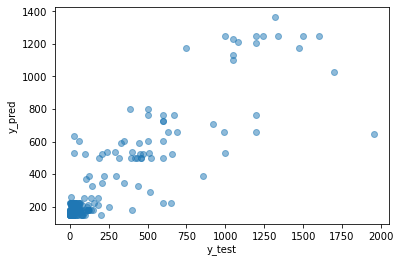

In [282]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [283]:
mean_squared_error(y_test,y_pred)

47329.94645013886

### RMSE

In [284]:
np.sqrt(mean_squared_error(y_test,y_pred))

217.55446777793108

### R2 score

In [285]:
r2_score(y_test,y_pred)

0.6790024349421155

In [47]:
# AdaBoost Regressor accuracy score 67%

## Hyperparameter Tuning in Random Forest Regressor Model

In [286]:
# Using RandomizedSearchCV method for improving the r2 score
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [287]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [288]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [289]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [290]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [291]:
prediction = rf_random.predict(x_test)

## Scatter Plot

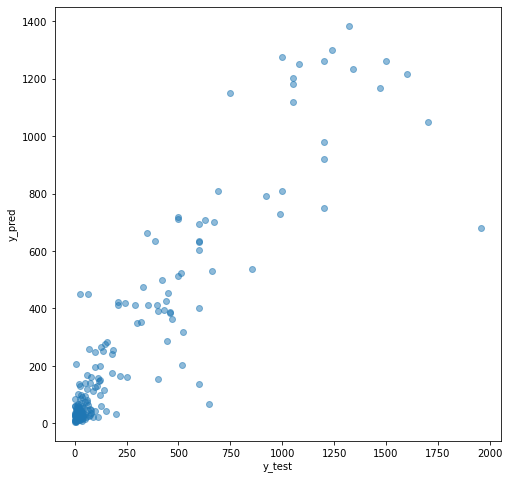

In [292]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [293]:
mean_squared_error(y_test,y_pred)

47329.94645013886

### RMSE

In [294]:
np.sqrt(mean_squared_error(y_test,y_pred))

217.55446777793108

## R2 score

In [295]:
r2_score(y_test,y_pred)

0.6790024349421155

In [48]:
# I have tried to improve the accuracy score for random forest regressor model but it is reducing the accuracy score.

## Regularization

In [296]:
# lasso regularization
lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [297]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [298]:
# best alphas parameters
alpha = lasscv.alpha_
alpha

0.15728330088230535

In [299]:
# now we have best parameter lets use the lasso regularization
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.15728330088230535)

In [300]:
lasso_reg.score(x_test,y_test)

0.525485245434179

In [49]:
# I have tried to improve the accuracy score for Linear Regression with the help of lasso but it is not increasing.

## Saving the Best Model

In [301]:
import pickle

In [302]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [50]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/xD0FJns7vX0/maxresdefault.jpg")

In [51]:
# The best model is Random Forest Regressor whose accuracy score is 78%